In [1]:
%matplotlib inline

def plot_pred():
    func = toolbox.compile(expr=hof[0])
    y_hat = []
    y = []
    y_r = []
    for a, i in enumerate(t):
        y_hat.append(func(i))
        y.append(p[a])
        y_r.append(p_r[a])
        
    from matplotlib import pyplot as plt
    plt.plot(t,y)
    
    plt.plot(t, y_hat)
    plt.plot(t, y_r)
    plt.xlabel('time')  # x-axis
    plt.ylabel('x(t)')  # y-axis
    plt.title('Data')  # title
    plt.grid()  # grid
    plt.legend(['with error','predicted','real'])
    plt.show()  # plot show

In [2]:
# -*- coding: utf-8 -*-
# 그 다음부터는 이거 여러번 실행해도 됨
"""
Created on Thu Jan  4 14:17:05 2018
@author: Bany
"""
###############################import###############################
import operator
import math
import random
import pandas as pd
import numpy
import time
import os

from deap import algorithms
from deap import base
from deap import creator
from deap import tools
from deap import gp
from scoop import futures
import matplotlib.pyplot as plt


###################################################################

###################### Define functions############################
def safeDiv(left, right):
    try:
        return left / right
    except ZeroDivisionError:
        return 1
    
def sqrt(left):
    if left>=0:
        return left**0.5
    else:
        return 0
    
def expe(left):
    if left>=0:
        return numpy.exp(-left)
    else:
        return 0

    
    
random.seed(time.time())
ran1 = int(random.random()*10)
ran2 =int(random.random()*10)

def random0to10():
    r={}
    for i in range(1,1000):
        r[i]=random.randint(1,5)
        
    return r

pset = gp.PrimitiveSet("MAIN", 1)
pset.addPrimitive(operator.add, 2)
#pset.addPrimitive(operator.sub, 2)
pset.addPrimitive(operator.mul, 2)
pset.addPrimitive(expe, 1)
#set.addPrimitive(safeDiv, 2)
pset.addPrimitive(sqrt,1)
pset.addPrimitive(operator.neg, 1)
pset.addPrimitive(math.cos, 1)
pset.addPrimitive(math.sin, 1)
pset.addEphemeralConstant("rand",lambda: random.randint(1,5))
#pset.addEphemeralConstant("rand", lambda: random.randint(1,5))
#pset.addEphemeralConstant("rand"+str(ran1)+str(ran2), lambda: random.randint(min(ran1,ran2),max(ran1,ran2)))
pset.renameArguments(ARG0='x')



###################################################################



"g = pd.read_csv('data.csv')\np = g['x']\nt = list(numpy.arange(0,1400))\nf = {}\nfor i in range(len(t)):\n    f[t[i]] = p[i]"

In [3]:

creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", gp.PrimitiveTree, fitness=creator.FitnessMin)

toolbox = base.Toolbox()
toolbox.register("expr", gp.genHalfAndHalf, pset=pset, min_=1, max_=3)
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.expr)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("compile", gp.compile, pset=pset)
#toolbox.register("map", futures.map)

#########################input DATA#################################

g = pd.read_csv('os.csv')
p = g['x']
g_r = pd.read_csv('os_r.csv')
p_r = g_r['x']

t = list(numpy.arange(0,15,0.01))
f = {}
for i in range(len(t)):
    f[t[i]] = p[i]
    
ff = {}
for i in range(len(t)):
    ff[t[i]] = p_r[i]

'''g = pd.read_csv('data.csv')
p = g['x']
t = list(numpy.arange(0,1400))
f = {}
for i in range(len(t)):
    f[t[i]] = p[i]'''

def evalSymbReg(individual, points):
    # Transform the tree expression in a callable function
    func = toolbox.compile(expr=individual)
    start1 = time.time()
    # Evaluate the mean squared error between the expression
    sqerrors = ((func(x) - f[x])**2 for x in points)
    start2 = time.time()
    try:
        return max(sqerrors),
    except IndexError:
        return max(sqerrors),

###################################################################


toolbox.register("evaluate", evalSymbReg, points=t)
toolbox.register("select", tools.selTournament, tournsize=500)
toolbox.register("mate", gp.cxOnePoint)
toolbox.register("expr_mut", gp.genFull, min_=1, max_=3)
toolbox.register("mutate", gp.mutUniform, expr=toolbox.expr_mut, pset=pset)

toolbox.decorate("mate", gp.staticLimit(key=operator.attrgetter("height"), max_value=6))
toolbox.decorate("mutate", gp.staticLimit(key=operator.attrgetter("height"), max_value=6))

   	      	        fitness        	    size   
   	      	-----------------------	-----------
gen	nevals	max        	min    	max	min
0  	7000  	2.54924e+09	9.17017	14 	2  
1  	6701  	2.55264e+09	7.33194	26 	2  
2  	6753  	3.22818e+08	5.90656	25 	2  
3  	6725  	3.62147e+10	4.06149	25 	2  
4  	6736  	1.15136e+10	2.5567 	28 	2  
5  	6713  	3.11927e+12	2.17814	33 	2  
6  	6740  	2.2367e+10 	2.17168	35 	2  
7  	6722  	3.87324e+11	2.17156	32 	2  
8  	6717  	6.59658e+10	2.17138	34 	2  
9  	6725  	1.0618e+09 	2.17138	33 	2  
10 	6703  	1.10266e+10	2.17138	34 	2  
11 	6736  	4.95536e+09	2.17138	31 	2  
12 	6749  	3.8933e+09 	2.17138	33 	2  
13 	6740  	1.57101e+09	2.17138	36 	2  
14 	6722  	5.70497e+08	1.1509 	31 	2  
15 	6730  	1.93841e+09	0.620925	33 	2  
16 	6719  	3.04112e+11	0.486279	33 	2  
17 	6699  	1.25265e+10	0.413429	37 	2  
18 	6744  	2.15615e+08	0.407579	35 	2  
19 	6694  	4.45426e+09	0.403559	38 	2  
20 	6719  	1.33847e+10	0.363208	39 	2  
21 	6701  	3.77846e+10	0.363208	39 	2  
22

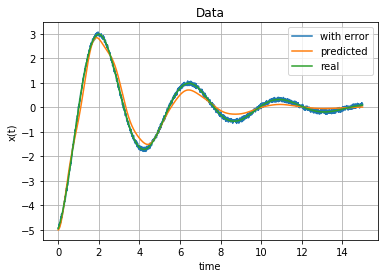

In [4]:
## random.seed(318)


pop = toolbox.population(n=7000)
hof = tools.HallOfFame(1)

stats_fit = tools.Statistics(lambda ind: ind.fitness.values)
stats_size = tools.Statistics(len)
mstats = tools.MultiStatistics(fitness=stats_fit, size=stats_size)

mstats.register("min", numpy.min)
mstats.register("max", numpy.max)
#############################################C.O, Muta,Gener##########
try:
    pop, log = algorithms.eaSimple(pop, toolbox, 0.8, 0.8, 4000, stats=mstats,
                                   halloffame=hof, verbose=True)
    print (hof[0])
    plot_pred()
except MemoryError:
    print (hof[0])
    plot_pred()
except KeyboardInterrupt:
    print (hof[0])
    plot_pred()

    

# print log
#print (pop)
#print (log)

